In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date 

In [2]:
print(matplotlib.__version__)

3.5.1


Setting path to the saved Data CSVs

In [2]:
path = 'C:/Users/manal/Desktop/Thesis/Manali-CallsPrediction/ml-generic-thesis-project-structure-main/01-raw-data/311_Yearly_CallCenterData'

Loading all the yearly Call center raw data from CSVs

In [3]:
RawData_2017 = pd.read_csv(path+'/RawData_2017.csv', sep=',', header=0, index_col=['unique_id'])
RawData_2017 = RawData_2017.reset_index()
RawData_2017 = RawData_2017.drop(columns=['Unnamed: 0','unique_id'])
RawData_2018 = pd.read_csv(path+'/RawData_2018.csv', sep=',', header=0, index_col=['unique_id'])
RawData_2018 = RawData_2018.reset_index()
RawData_2018 = RawData_2018.drop(columns=['Unnamed: 0','unique_id'])
RawData_2019 = pd.read_csv(path+'/RawData_2019.csv', sep=',', header=0, index_col=['unique_id'])
RawData_2019 = RawData_2019.reset_index()
RawData_2019 = RawData_2019.drop(columns=['Unnamed: 0','unique_id'])
RawData_2020 = pd.read_csv(path+'/RawData_2020.csv', sep=',', header=0, index_col=['unique_id'])
RawData_2020 = RawData_2020.reset_index()
RawData_2020 = RawData_2020.drop(columns=['Unnamed: 0','unique_id'])
RawData_2021 = pd.read_csv(path+'/RawData_2021.csv', sep=',', header=0, index_col=['unique_id'])
RawData_2021 = RawData_2021.reset_index()
RawData_2021 = RawData_2021.drop(columns=['Unnamed: 0','unique_id'])
RawData_2022 = pd.read_csv(path+'/RawData_2022.csv', sep=',', header=0, index_col=['unique_id'])
RawData_2022 = RawData_2022.reset_index()
RawData_2022 = RawData_2022.drop(columns=['Unnamed: 0','unique_id'])

C:\Users\manal\AppData\Local\Temp\ipykernel_10956\1542155817.py:7: DtypeWarning: Columns (5,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  RawData_2019 = pd.read_csv(path+'/RawData_2019.csv', sep=',', header=0, index_col=['unique_id'])


### Removing Duplicates

print('DataFrame after keeping only the last instance of the duplicate rows:')
# The `~` sign is used for negation. It changes the boolean value True to False and False to True.
#RawData_2015 = RawData_2015[~(RawData_2015.duplicated(keep='last'))]
#RawData_2016 = RawData_2016[~(RawData_2016.duplicated(keep='last'))]

In [4]:
Inquiries_All = pd.merge(RawData_2017, 
                        pd.merge(RawData_2018,
                                    pd.merge(RawData_2019,
                                             pd.merge(RawData_2020,
                                                      pd.merge(RawData_2021,RawData_2022, how="outer"), how="outer"), how="outer"), how="outer"), how="outer").fillna(0)
Inquiries_All

,date,time,date_time,agency,agency_name,inquiry_name,brief_description,call_resolution
0,2017-01-01T00:00:00.000,12:48:50 AM,2017-01-01T00:48:50.000,NYPD,New York City Police Department,Noise from Neighbor,Report a noisy neighbor.,CSMS SR
1,2017-01-01T00:00:00.000,1:07:24 AM,2017-01-01T01:07:24.000,NYPD,New York City Police Department,Noise from Neighbor,Report a noisy neighbor.,CSMS SR
2,2017-01-01T00:00:00.000,1:49:15 AM,2017-01-01T01:49:15.000,NYPD,New York City Police Department,Noise from Neighbor,Report a noisy neighbor.,CSMS SR
3,2017-01-01T00:00:00.000,1:03:11 AM,2017-01-01T01:03:11.000,NYPD,New York City Police Department,Noise from Neighbor,Report a noisy neighbor.,CSMS SR
4,2017-01-01T00:00:00.000,1:03:11 AM,2017-01-01T01:03:11.000,NYPD,New York City Police Department,Noise from Neighbor,Report a noisy neighbor.,CSMS SR
...,...,...,...,...,...,...,...,...
30268292,2022-10-01T00:00:00.000,1:27:32 AM,2022-10-01T01:27:32.000,0,0,Dirty Yard or Alley,"Report an unclean or untidy yard, alley, or co...",0
30268293,2022-10-01T00:00:00.000,12:05:41 AM,2022-10-01T00:05:41.000,0,0,Towed Vehicle,Find a towed vehicle and get it back or stop a...,0
30268294,2022-10-01T00:00:00.000,12:37:05 AM,2022-10-01T00:37:05.000,0,0,Coronavirus (COVID-19) Resources and Support,Get information about programs and services fo...,0
30268295,2022-10-01T00:00:00.000,12:46:35 AM,2022-10-01T00:46:35.000,0,0,Housing Options for Seniors,Learn about housing options for people age 60 ...,0


In [5]:
Inquiries = Inquiries_All.sort_values('date_time').drop_duplicates(keep='last')

In [6]:
Inquiries = Inquiries.drop(columns=['agency','agency_name','call_resolution','time'])

In [10]:
Inquiries['YEAR'] = pd.to_datetime(Inquiries['date_time']).dt.year.astype('int32')
Inquiries['Month'] = pd.to_datetime(Inquiries['date_time']).dt.month.astype('int32')
Inquiries['Day_of_Month'] = pd.to_datetime(Inquiries['date_time']).dt.day.astype('int32')
Inquiries['Day_of_Year'] = pd.to_datetime(Inquiries['date_time']).dt.dayofyear.astype('int32')
Inquiries['Quarter'] = pd.to_datetime(Inquiries['date_time']).dt.quarter.astype('int32')
Inquiries['Weekday'] = pd.to_datetime(Inquiries['date_time']).dt.day_name()
Inquiries['time_hour'] = pd.to_datetime(Inquiries['date_time']).dt.hour

In [12]:
Inquiries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30268297 entries, 0 to 30268296
Data columns (total 4 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   date_time          object
 2   inquiry_name       object
 3   brief_description  object
dtypes: object(4)
memory usage: 1.1+ GB


In [15]:
path = 'C:/Users/manal/Desktop/Thesis/Manali-CallsPrediction/ml-generic-thesis-project-structure-main/01-raw-data/'
Inquiries.to_csv(path+'CallCenter_Inquiries.csv', sep=',')

In [8]:
Inquiries_All.call_resolution.unique()

array(['Information Provided', 'Internal Transfer',
       'Transfer to City Agency', 'Routed to Web Page',
       'Alert Information Provided', 'CSMS SR', 'Universal Intake SR',
       'Agency Closed', 'Hot Transfer 911', 'Referral', 'Scheduled Appt',
       'Cancelled Appt', 'Facility Finder', 'Appointment',
       'Caller Hung Up', 'Out of 3-1-1 Jurisdiction', 'SmartScript',
       'Unspecified', 'SR Information Provided', 'Rescheduled Appt',
       'Unmet Need', 'Hung Up', 'Done', 'Staff Information Provided',
       'Modified Appt', 'Busy Signal', 'Appt Information Provided',
       'Incomplete', 'No Answer', 'Unavailable',
       'Additional Requests Created', 'Call Dropped',
       'Call-Back Notification', 'In Progress', 'Declined', 'Complete',
       'Expired - Manual', 'Expired - Attempts', 'Not At This Number',
       'Expired - Time', 'Away Long Term', 'Success', 'Scheduled', 0],
      dtype=object)

In [13]:
#path = 'C:/Users/manal/Desktop/Thesis/Manali-CallsPrediction/ml-generic-thesis-project-structure-main/01-raw-data'
#Inquiries_All = pd.read_csv(path+'/CallCenter_Inquiries.csv', sep=',', header=0) #, index_col=['unique_id']

# Visualizations

In [13]:
Inquiries_All = Inquiries

In [14]:
Inquiries_All.columns

Index(['date', 'date_time', 'inquiry_name', 'brief_description', 'YEAR',
       'Month', 'Day_of_Month', 'Day_of_Year', 'Quarter', 'Weekday',
       'time_hour'],
      dtype='object')

## Daily 

<Figure size 800x400 with 0 Axes>

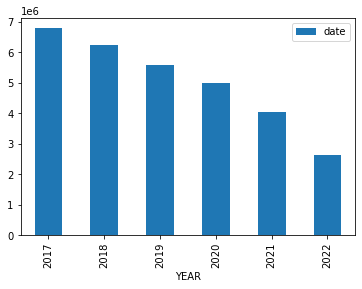

In [20]:
plt.figure(figsize=(10,5), dpi=80)
Inquiries_All.groupby('YEAR').count()[['date']].plot.bar()
plt.show()

DailyInquiries

In [19]:
DailyInquiries = Inquiries_All.groupby(['YEAR','Day_of_Year']).count()[['date']].rename(columns={'date':'Inquiries'})
DailyInquiries

Inquiries
YEAR Day_of_Year           
2017 1                 7574
     2                13189
     3                24678
     4                23380
     5                22809
...                     ...
2022 270              11598
     271              11886
     272              11772
     273              10669
     274                 96

[1906 rows x 1 columns]

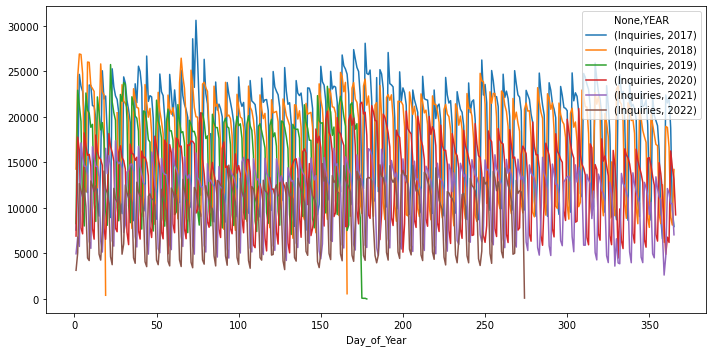

In [20]:
ax = DailyInquiries.unstack(level=0).plot(kind='line', subplots=False, rot=0, figsize=(10, 5))
plt.tight_layout()

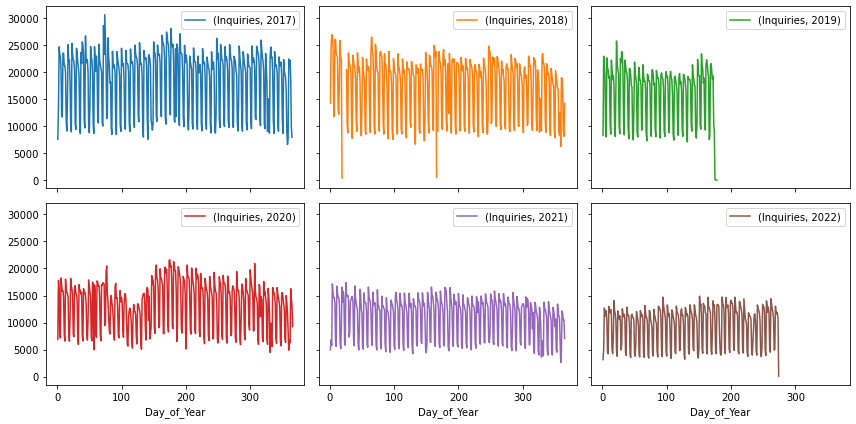

In [21]:
ax = DailyInquiries.unstack(level=0).plot(kind='line', subplots=True, rot=0, figsize=(12, 6), layout=(2, 3), sharex=True, sharey=True)
plt.tight_layout()

plt.savefig('10_Figures/DailyInquiries.png')

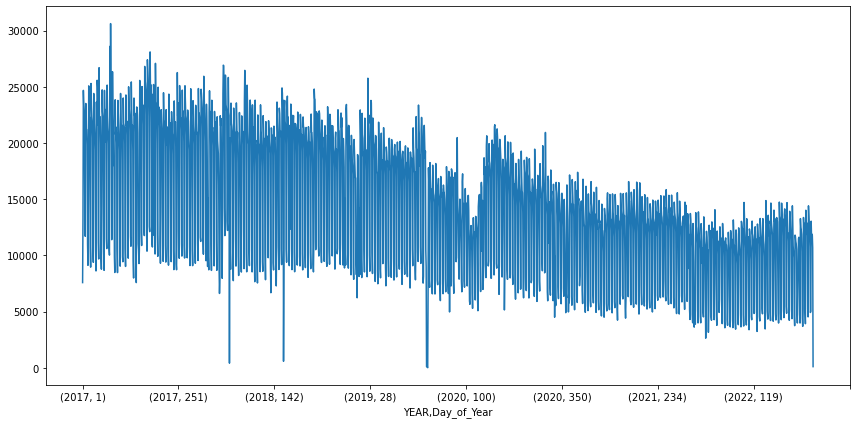

In [48]:
ax = DailyInquiries['Inquiries'].plot(kind='line', subplots=False, rot=0, figsize=(12, 6))
plt.tight_layout()

## Monthly Seasonal Plot

In [25]:
MonthlyInquiries = Inquiries_All.groupby(['YEAR','Month']).count()[['date']].rename(columns={'date':'Inquiries'})
MonthlyInquiries

Inquiries
YEAR Month           
2017 1         568728
     2         522677
     3         601387
     4         532778
     5         576964
...               ...
2022 6         313737
     7         309854
     8         300473
     9         300540
     10            96

[64 rows x 1 columns]

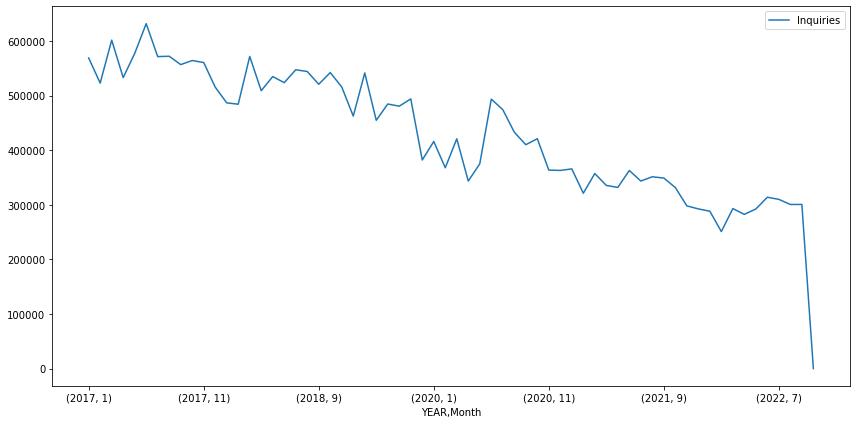

In [26]:
#plt.figure(figsize=(10,5), dpi=80)
ax = MonthlyInquiries.plot(kind='line', subplots=False, rot=0, figsize=(12, 6))
plt.tight_layout()

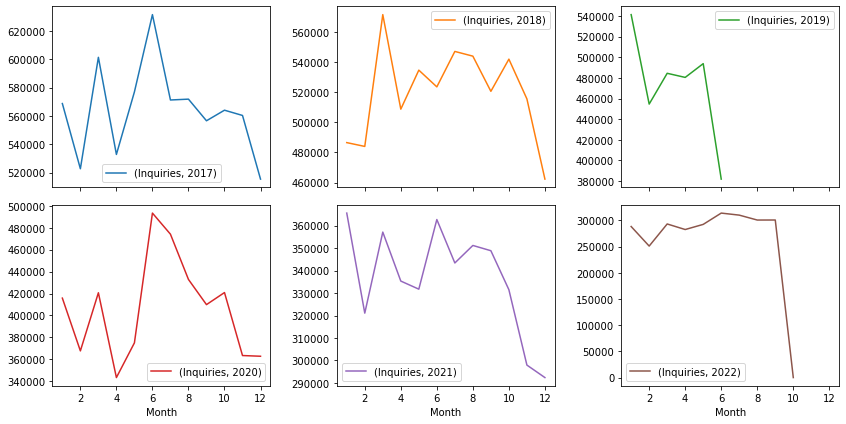

In [27]:
ax = MonthlyInquiries.unstack(level=0).plot(kind='line', subplots=True, rot=0, figsize=(12, 6), layout=(2, 3))
plt.tight_layout()

plt.savefig('10_Figures/MonthlyInquiries.png')

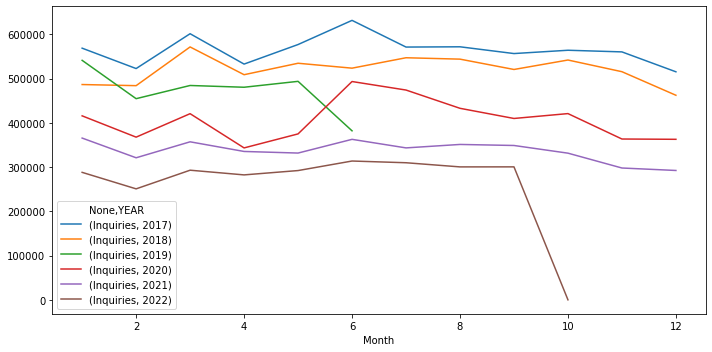

In [28]:
ax = MonthlyInquiries.unstack(level=0).plot(kind='line', subplots=False, rot=0, figsize=(10, 5))
plt.tight_layout()
plt.savefig('10_Figures/MonthlyInquiries.png')

Every year 3rd month, an increase in the inquiries is seen, decrease in December(12th month) & since 2019, 6th month, the inquiries have decreased till the spike in 2020 6th month

## Quarter

In [29]:
QuarterlyInquiries = Inquiries_All.groupby(['YEAR','Quarter']).count()[['date']].rename(columns={'date':'Inquiries'})
QuarterlyInquiries

Inquiries
YEAR Quarter           
2017 1          1692792
     2          1741294
     3          1699655
     4          1639715
2018 1          1542109
     2          1567008
     3          1611642
     4          1519860
2019 1          1480277
     2          1356193
2020 1          1204231
     2          1211752
     3          1316860
     4          1147178
2021 1          1043825
     2          1029822
     3          1043455
     4           921844
2022 1           831963
     2           888320
     3           910867
     4               96

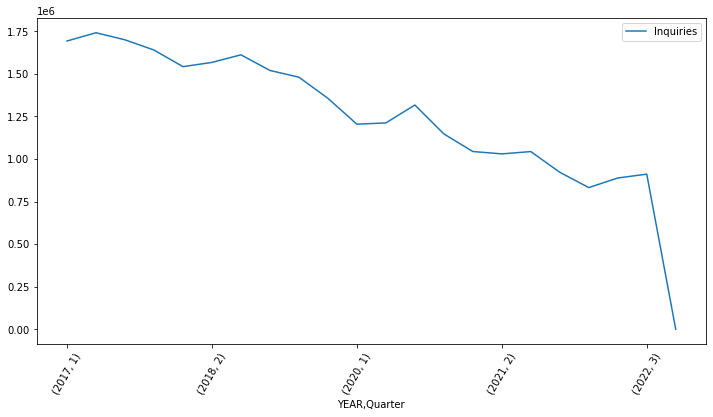

<Figure size 700x350 with 0 Axes>

In [62]:
ax = QuarterlyInquiries.plot(kind='line', subplots=False, rot=0, figsize=(12, 6))
plt.figure(figsize=(10,5), dpi=70)
ax.tick_params(axis='x', rotation=60, labelsize=10)
plt.tight_layout()
plt.show()

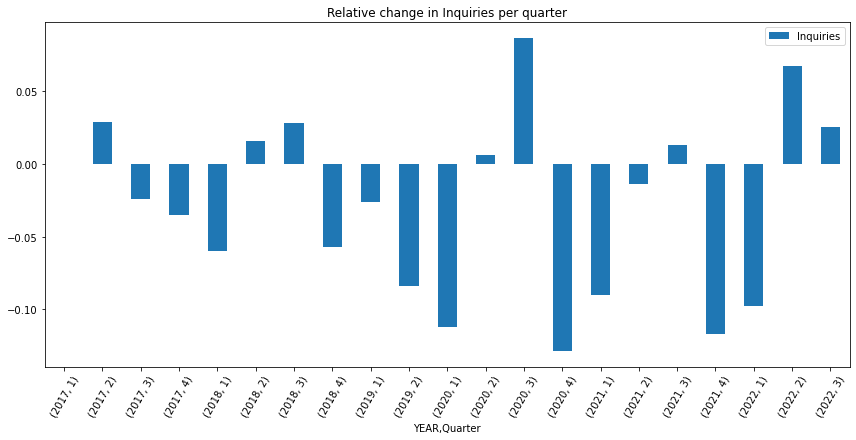

In [31]:
ax = QuarterlyInquiries.iloc[:-1,:].pct_change().plot(kind='bar', subplots=False, rot=0, figsize=(12, 6))
#ax.figure(figsize=(10,5), dpi=70)
ax.tick_params(axis='x', rotation=60, labelsize=10)
plt.tight_layout()
plt.title('Relative change in Inquiries per quarter')
plt.show()

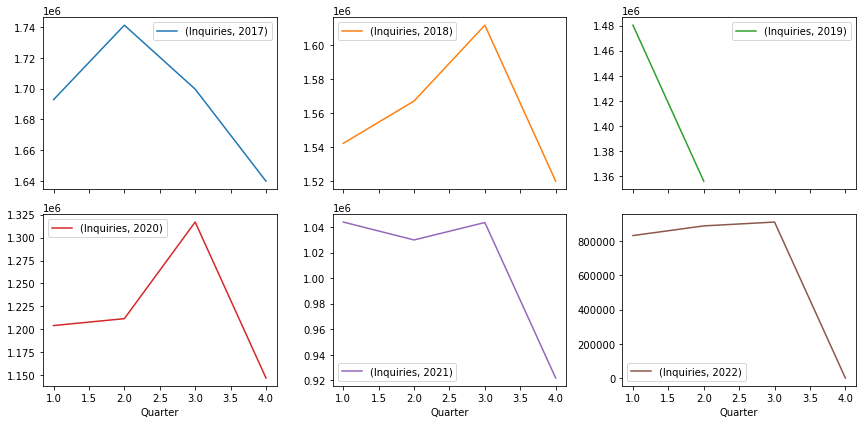

In [32]:
ax = QuarterlyInquiries.unstack(level=0).plot(kind='line', subplots=True, rot=0, figsize=(12, 6), layout=(2, 3))
plt.tight_layout()

plt.savefig('10_Figures/QuarterlyInquiries.png')

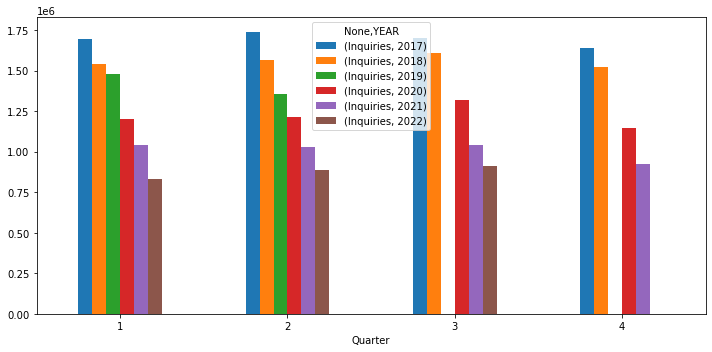

In [33]:
ax = QuarterlyInquiries.unstack(level=0).plot(kind='bar', subplots=False, rot=0, figsize=(10, 5))
plt.tight_layout()
plt.savefig('10_Figures/QuarterlyInquiries.png')

Since 2019, 3rd quarter, the inquiries drastically decreased, till 2020 3rd quarter

## Weekly 

In [34]:
WeeklyInquiries = Inquiries_All.groupby(['YEAR','Weekday']).count()[['date']].rename(columns={'date':'Inquiries'})
WeeklyInquiries

Inquiries
YEAR Weekday             
2017 Friday       1038535
     Monday       1185170
     Saturday      563048
     Sunday        501618
     Thursday     1137935
     Tuesday      1181085
     Wednesday    1166065
2018 Friday        950638
     Monday       1092066
     Saturday      514204
     Sunday        453746
     Thursday     1057664
     Tuesday      1109586
     Wednesday    1062715
2019 Friday        448830
     Monday        473427
     Saturday      238814
     Sunday        206025
     Thursday      473978
     Tuesday       504128
     Wednesday     491268
2020 Friday        735943
     Monday        862575
     Saturday      399862
     Sunday        365989
     Thursday      811637
     Tuesday       880788
     Wednesday     823227
2021 Friday        622465
     Monday        739230
     Saturday      308535
     Sunday        274089
     Thursday      668713
     Tuesday       731231
     Wednesday     694683
2022 Friday        411789
     Monday        465576
     Saturday      181371
     Sunday        160243
     Thursday      459814
     Tuesday       489515
     Wednesday     462938

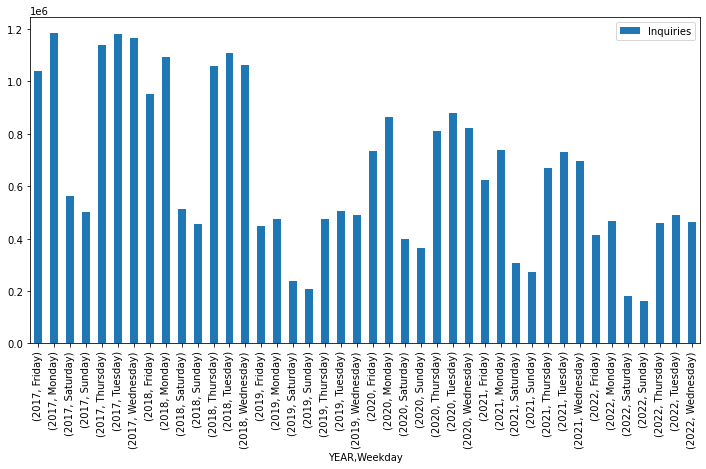

<Figure size 700x350 with 0 Axes>

In [35]:
ax = WeeklyInquiries.plot(kind='bar', subplots=False, rot=0, figsize=(12, 6))
plt.figure(figsize=(10,5), dpi=70)
ax.tick_params(axis='x', rotation=90, labelsize=10)
plt.tight_layout()
plt.show()

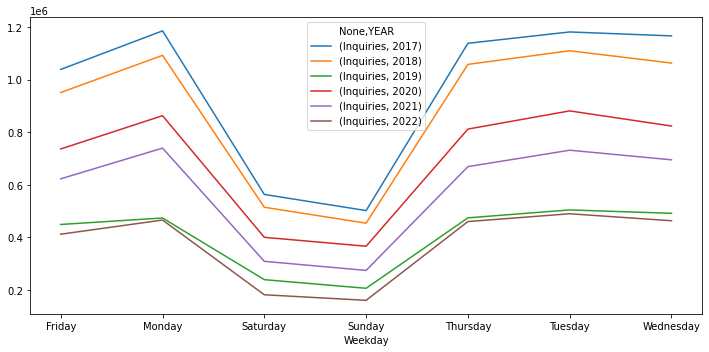

In [36]:
ax = WeeklyInquiries.unstack(level=0).plot(kind='line', subplots=False, rot=0, figsize=(10, 5))
plt.tight_layout()
plt.savefig('10_Figures/WeeklyInquiries.png')

C:\Users\manal\AppData\Local\Temp\ipykernel_40252\758456560.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Inquiries_All['WeekofYear'] = pd.to_datetime(Inquiries_All['date']).dt.week


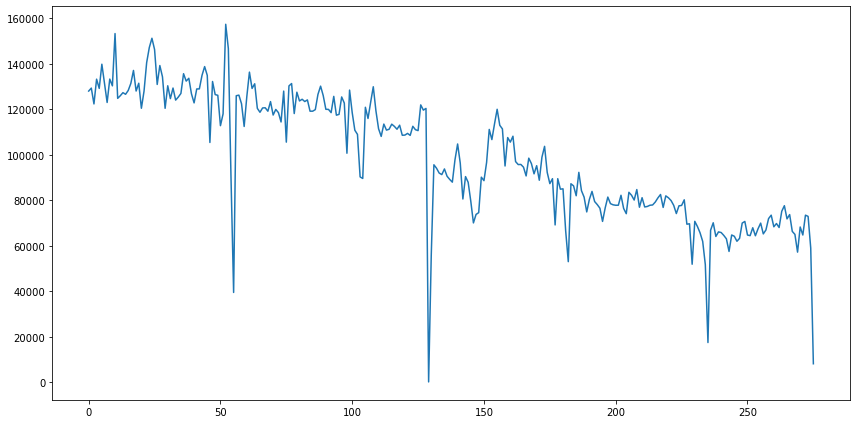

In [61]:
Inquiries_All['WeekofYear'] = pd.to_datetime(Inquiries_All['date']).dt.week
individual_weekly = Inquiries_All.groupby(['YEAR','WeekofYear'],as_index=False).size()
individual_weekly
ax = individual_weekly['size'].plot(kind='line', subplots=False, rot=0, figsize=(12, 6))
plt.tight_layout()

# Hourly

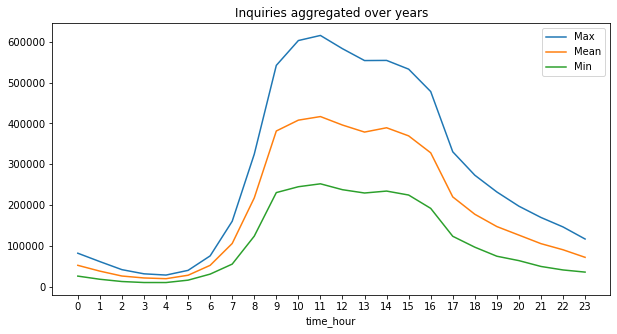

In [39]:
hourly = Inquiries_All.groupby(['YEAR','time_hour'],as_index=False).size()
plt.figure(figsize=(10,5))
#hourly.groupby('time_hour').sum()['size'].plot()
hourly.groupby('time_hour').max()['size'].plot()
hourly.groupby('time_hour').mean()['size'].plot()
hourly.groupby('time_hour').min()['size'].plot()
plt.xticks(np.arange(0,24))
plt.legend(['Max','Mean','Min'])
plt.title('Inquiries aggregated over years')
plt.show()

In [45]:
individual_weekly = Inquiries_All.groupby(['YEAR','Day_of_Year','Weekday'],as_index=False).size()
individual_weekly

,YEAR,Day_of_Year,Weekday,size
0,2017,1,Sunday,7574
1,2017,2,Monday,13189
2,2017,3,Tuesday,24678
3,2017,4,Wednesday,23380
4,2017,5,Thursday,22809
...,...,...,...,...
1901,2022,270,Tuesday,11598
1902,2022,271,Wednesday,11886
1903,2022,272,Thursday,11772
1904,2022,273,Friday,10669
